<a href="https://colab.research.google.com/github/minnnnji/Machine_Learning/blob/master/classification%EC%97%B0%EC%8A%B5_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minzzzzi","key":"74a980fb52033cf0ead89c84120a4a9c"}'}

In [2]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle

Uninstalling kaggle-1.5.8:
  Successfully uninstalled kaggle-1.5.8
     |████████████████████████████████| 1.5MB 4.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 59 kB 2.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73274 sha256=59b1d8e3570a7ef418b767869364c733b744841eaf2c0d021174d151a864a55a
  Stored in directory: /root/.cache/pip/wheels/cf/aa/f0/ed1179bbcd729b29d0dfda59826fb3b55f0a4a0c3f713c1c82
Successfully built kaggle


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c 2020aidiscomfort

  0% 0.00/19.5k [00:00<?, ?B/s]
100% 19.5k/19.5k [00:00<00:00, 15.3MB/s]


In [5]:
!unzip 2020aidiscomfort.zip

Archive:  2020aidiscomfort.zip
  inflating: submit_sample.csv       
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('submit_sample.csv')

train[:5]

,date,aveTemp,maxTemp,rain,aveHumidity,solar,Category
0,2013-01-01,-4.7,0.0,3.1,73.5,5.76,0
1,2013-01-02,-11.7,-4.8,NaN,40.8,9.62,0
2,2013-01-03,-13.2,-9.3,NaN,42.8,9.78,0
3,2013-01-04,-10.7,-5.8,NaN,44.3,9.54,0
4,2013-01-05,-7.0,-1.2,NaN,59.4,8.09,0


In [ ]:
submit[:5]

In [13]:
import datetime as dt

In [69]:
train['solar'] = train['solar'].interpolate()
train.fillna(value={'rain':0}, inplace=True)

train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].map(dt.datetime.toordinal)

train[:5]

,date,aveTemp,maxTemp,rain,aveHumidity,solar,Category
0,719163,-4.7,0.0,3.1,73.5,5.76,0
1,719163,-11.7,-4.8,0.0,40.8,9.62,0
2,719163,-13.2,-9.3,0.0,42.8,9.78,0
3,719163,-10.7,-5.8,0.0,44.3,9.54,0
4,719163,-7.0,-1.2,0.0,59.4,8.09,0


In [70]:
test['solar'] = test['solar'].interpolate()
test.fillna(value={'rain':0}, inplace=True)

test['date'] = pd.to_datetime(test['date'])
test['date'] = test['date'].map(dt.datetime.toordinal)

test[:5]

,date,aveTemp,maxTemp,rain,aveHumidity,solar
0,719163,21.2,25.1,7.5,75.9,5.33
1,719163,20.0,24.7,35.3,77.3,13.41
2,719163,21.6,26.5,2.5,66.1,16.87
3,719163,18.4,21.9,9.5,70.3,11.01
4,719163,21.9,27.4,2.1,61.5,25.94


In [71]:
x_train = train.loc[:,'aveTemp':'solar']
y_train = train.loc[:,'Category']

x_test = test.loc[:,'aveTemp':'solar']

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [23]:
from sklearn.metrics import accuracy_score

---
# KNN
---

In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

#ver.std
#KNN.fit(x_train_std,y_train)
#train_pred_KNN = KNN.predict(x_train_std)
#print(accuracy_score(y_train,train_pred_KNN))

#ver.no Std
KNN.fit(x_train,y_train)
train_pred_KNN = KNN.predict(x_train)
print(accuracy_score(y_train,train_pred_KNN))

1.0


In [51]:
test_pred = KNN.predict(x_test)

for i in range(len(test_pred)):
  submit['Category'][i] = test_pred[i]

submit.to_csv('submission.csv',header=True,index=None)
test_pred[:20]

array([2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2])

In [52]:
!kaggle competitions submit -c 2020aidiscomfort -f submission.csv -m "KNN_Std"

100% 342/342 [00:02<00:00, 129B/s]
Successfully submitted to SejongAI.텀프로젝트.[기상상태에 따른 불쾌지수 분류]

no std / k = 5 / 0.48
<br>
no std / k = 7 / 0.44
<br>
no std / k = 3 / 0.47

---
#Logitic Regression
---

In [82]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=0.1, random_state = 1,solver='sag', max_iter=1000)
logit.fit(x_train,y_train)

train_pred_Logit = logit.predict(x_train)
print(accuracy_score(y_train,train_pred_Logit))

0.7217815741305674


In [83]:
test_pred = logit.predict(x_test)

for i in range(len(test_pred)):
  submit['Category'][i] = test_pred[i]

submit.to_csv('submission.csv',header=True,index=None)
test_pred[:20]

array([0, 1, 2, 1, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [84]:
!kaggle competitions submit -c 2020aidiscomfort -f submission.csv -m "logit"

100% 342/342 [00:03<00:00, 100B/s]
Successfully submitted to SejongAI.텀프로젝트.[기상상태에 따른 불쾌지수 분류]

(C=0.1, random_state = 1,class_weight = 'balanced',solver='sag', max_iter=1000) / 0.58
<br>
(C=10.0, random_state = 1,class_weight = 'balanced',solver='sag', max_iter=1000) / 0.57
<br>
(C=0.1, random_state = 1,solver='sag', max_iter=1000) / no balance / 0.51


---
#LDA
---

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cld = LinearDiscriminantAnalysis()
cld.fit(x_train,y_train)

train_pred_cld = cld.predict(x_train)
print(accuracy_score(y_train,train_pred_cld))

0.7101891397193411


In [94]:
test_pred = cld.predict(x_test)

for i in range(len(test_pred)):
  submit['Category'][i] = test_pred[i]

submit.to_csv('submission.csv',header=True,index=None)
test_pred[:20]

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
!kaggle competitions submit -c 2020aidiscomfort -f submission.csv -m "cld"

100% 342/342 [00:03<00:00, 103B/s]
Successfully submitted to SejongAI.텀프로젝트.[기상상태에 따른 불쾌지수 분류]

0.52

---
#QDA
---

In [96]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cld = QuadraticDiscriminantAnalysis()
cld.fit(x_train,y_train)

train_pred_cld = cld.predict(x_train)
print(accuracy_score(y_train,train_pred_cld))

0.7394752898108603


In [97]:
test_pred = cld.predict(x_test)

for i in range(len(test_pred)):
  submit['Category'][i] = test_pred[i]

submit.to_csv('submission.csv',header=True,index=None)
test_pred[:20]

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [98]:
!kaggle competitions submit -c 2020aidiscomfort -f submission.csv -m "cld"

100% 342/342 [00:02<00:00, 128B/s]
Successfully submitted to SejongAI.텀프로젝트.[기상상태에 따른 불쾌지수 분류]

0.57

---
#Decision Tree
---

In [111]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3, class_weight = 'balanced')
dtc.fit(x_train, y_train)

train_pred_dtc = dtc.predict(x_train)
print(accuracy_score(y_train,train_pred_dtc))

0.7632702867602197


In [112]:
test_pred = dtc.predict(x_test)

for i in range(len(test_pred)):
  submit['Category'][i] = test_pred[i]

submit.to_csv('submission.csv',header=True,index=None)
test_pred[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2])

In [113]:
!kaggle competitions submit -c 2020aidiscomfort -f submission.csv -m "dtc"

100% 342/342 [00:02<00:00, 127B/s]
Successfully submitted to SejongAI.텀프로젝트.[기상상태에 따른 불쾌지수 분류]

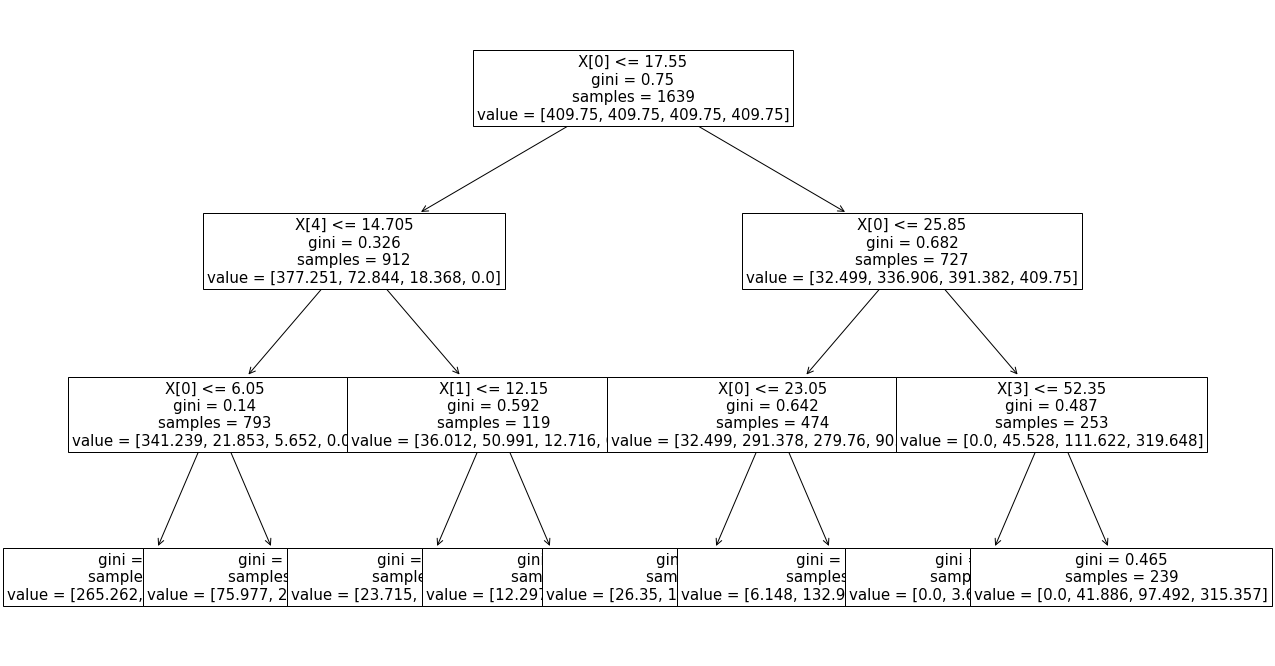

In [117]:
import matplotlib.pyplot as plt
from sklearn import tree
#tree.plot_tree(dtc.fit(X_train,y_train))
fig, ax = plt.subplots(figsize=(20, 12))
tree.plot_tree(dtc.fit(x_train, y_train), fontsize=15)
plt.savefig('tree_high_dpi', dpi=100)

criterion='gini'/ 0.55
<br>
(criterion='entropy', random_state=1, max_depth=5, class_weight = 'balanced') / 0.61
<br>
(criterion='gini', random_state=1, max_depth=5, class_weight = 'balanced') / 0.73
<br>
(criterion='gini', random_state=1, max_depth=3, class_weight = 'balanced') / 0.75 / 이 문제 1등의 정확도
<br>
(criterion='gini', random_state=1, max_depth=7, class_weight = 'balanced') / 0.52